In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import yt

from galaxy_analysis.plot.plot_styles import *
from galaxy_analysis.analysis import Galaxy




In [6]:
#
# Fidcuial
#
gal = Galaxy('DD1053', wdir = '/home/aemerick/work/enzo_runs/leo_p/fiducial/sn_H2atten_H2sh/')

ds_f   = yt.load('/home/aemerick/work/enzo_runs/leo_p/fiducial/3pc_H2/py3temp/DD0162/DD0162')
data_f = ds_f.all_data()
gal_f  = Galaxy('DD0162', wdir = '/home/aemerick/work/enzo_runs/leo_p/fiducial/3pc_H2/py3temp/')

ds_avg = yt.load('/home/aemerick/work/enzo_runs/leo_p/IMF_average/lvl8/DD0148/DD0148')
data_avg = ds_avg.all_data()

gal_avg = Galaxy('DD0148', wdir = '/home/aemerick/work/enzo_runs/leo_p/IMF_average/lvl8/')

Parsing Hierarchy : 100%|██████████| 1109/1109 [00:00<00:00, 3109.45it/s]
/home/aemerick/code/onezone/onezone/data_tables.py:98: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:
Parsing Hierarchy : 100%|██████████| 1014/1014 [00:00<00:00, 2445.54it/s]


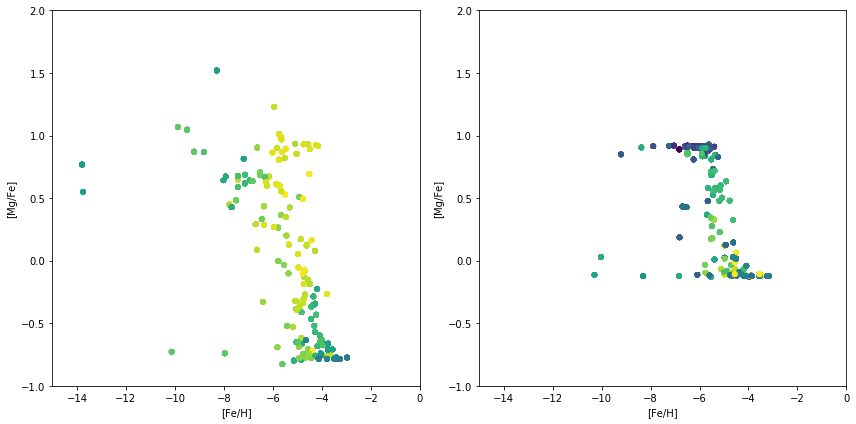

In [13]:
#
# plot stellar abundances
#

fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)


#
# first one
#
x = gal_f.df[('io','particle_Fe_over_H')]
y = gal_f.df[('io','particle_Mg_over_Fe')]
z = gal_f.df['creation_time'].to('Myr').value
ax[0].scatter(x,y,c=z,s = 20)


x = gal_avg.df[('io','particle_Fe_over_H')]
y = gal_avg.df[('io','particle_Mg_over_Fe')]
z = gal_avg.df['creation_time'].to('Myr').value
ax[1].scatter(x,y,c=z,s = 20)


for a in ax:
    a.set_xlabel('[Fe/H]')
    a.set_ylabel('[Mg/Fe]')
    
    a.set_xlim(-15,0)
    a.set_ylim(-1,2)# = gal_f.df[('io','particle_Fe_over_H')]

    
plt.tight_layout()

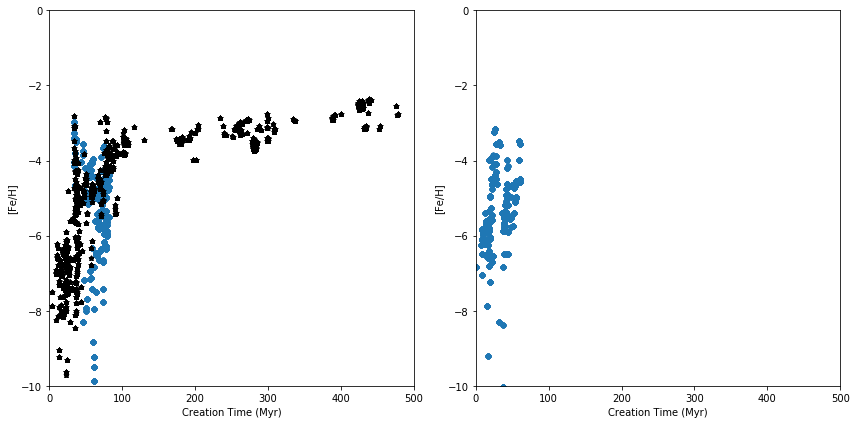

In [27]:
#
# plot stellar abundances
#

fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)

field = 'particle_Fe_over_H'
#
# first one
#
y = gal_f.df[('io',field)]
x = gal_f.df['creation_time'].to('Myr').value
ax[0].scatter(x-np.min(x),y,s = 20)


y = gal_avg.df[('io',field)]
x = gal_avg.df['creation_time'].to('Myr').value

ax[1].scatter(x-np.min(x),y,s = 20)

y = gal.df[('io',field)]
x = gal.df['creation_time'].to('Myr').value
ax[0].scatter(x-np.min(x),y,s = 20, marker = '*', color = 'black')

for a in ax:
    a.set_xlabel('Creation Time (Myr)')
    a.set_ylabel('[Fe/H]')
    
    a.set_xlim(0,500)
    a.set_ylim(-10,0)

plt.tight_layout()

In [12]:
hist, bins = np.histogram(gal.df[('io','particle_Fe_over_H')].value, bins = np.arange(-15,0,0.2))

(-2, 2)

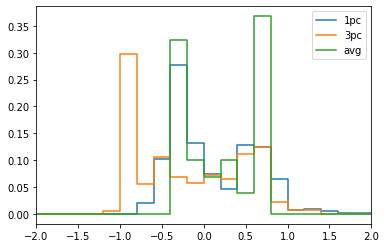

In [25]:
hist, bins = np.histogram(gal.df[('io','particle_Mg_over_Fe')].value, bins =np.arange(-3,3,0.2))
plt.step( bins[:-1], hist / (1.0*np.sum(hist)), where = 'pre',label='1pc')

hist, bins = np.histogram(gal_f.df[('io','particle_Mg_over_Fe')].value, bins = np.arange(-3,3,0.2))
plt.step( bins[:-1], hist / (1.0*np.sum(hist)), where = 'pre',label='3pc')

hist, bins = np.histogram(gal_avg.df[('io','particle_Mg_over_Fe')].value, bins = np.arange(-3,3,0.2))
plt.step( bins[:-1], hist / (1.0*np.sum(hist)), where = 'pre',label='avg')


plt.legend(loc='best')


plt.xlim(-2,2)